In [3]:
%qtconsole

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df_s = pd.read_csv('./data/bhive/grid_accuracy.csv')

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
grouped = df_sparse.groupby(['norm', 'lamb_P', 'lamb_Q', 'lamb_R'])
grouped.plot(x='accuracy_GS', y='accuracy_KS', ax=ax)

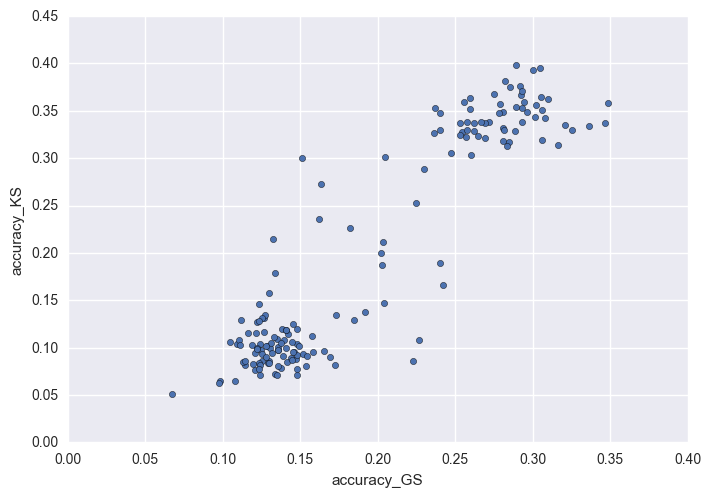

In [7]:
df_s.plot(kind='scatter', x='accuracy_GS', y='accuracy_KS'); plt.show()

In [9]:
import plotly.plotly as py

In [22]:
# col2str = lambda col, df: '{}: {}'.format(col, df[col])
# tx = lambda cols, df: '<br>'.join([col2str(col, df) for col in cols])
# labs = ['norm', 'lamb_P', 'lamb_Q', 'lamb_R']

tx = lambda n,lp,lq,lr, : 'norm: {}<br>lamb_P: {}<br>lamb_Q: {}<br>lamb_R: {}'.format(n,lp,lq,lr)
texts = [tx(*i) for i in zip(df_s.norm, df_s.lamb_P, df_s.lamb_Q, df_s.lamb_R)]


fig = {
    'data': [
        {
            'x': df_s.accuracy_GS, 
            'y': df_s.accuracy_KS, 
            'text': texts,
            'mode': 'markers', 
        },
        # {   'x': df1952.gdpPercap, 
        #     'y': df1952.lifeExp, 
        #     'text': df1952.country, 
        #     'mode': 'markers', 
        #     'name': '1952'}
    ],
    'layout': {
        'xaxis': {'title': 'GS Accuracy'},     #, 'type': 'log'},
        'yaxis': {'title': "KS Accuracy"}
    }
}

py.iplot(fig, filename='basic-scatter')

In [28]:
tx = lambda lp,lq,lr, : 'lamb_P: {}<br>lamb_Q: {}<br>lamb_R: {}'.format(lp,lq,lr)
texts = lambda df: [tx(*i) for i in zip(df.lamb_P, df.lamb_Q, df.lamb_R)]

df_L1 = df_s[df_s.norm == 'L1']
df_L2 = df_s[df_s.norm == 'L2']

fig = {
    'data': [
        {
            'x': df_L1.accuracy_GS, 
            'y': df_L1.accuracy_KS, 
            'text': texts(df_L1),
            'mode': 'markers', 
            'name': 'L1'
        },
        {   
            'x': df_L2.accuracy_GS, 
            'y': df_L2.accuracy_KS, 
            'text': texts(df_L2),
            'mode': 'markers', 
            'name': 'L2'
        }
    ],
    'layout': {
        'xaxis': {'title': 'GS Accuracy'},     #, 'type': 'log'},
        'yaxis': {'title': "KS Accuracy"}
    }
}

py.iplot(fig, filename='basic-scatter')